In [1]:
 # visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

#basic imports
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
#Read in data
df = pd.read_csv("../Resources/cat.csv")
df.head()

,Unnamed: 0,Animal Type,Animal Id,Animal Breed,Animal Origin,Census Tract,Council District,Chip Status,Intake Date,Outcome Date,Intake Condition,Outcome Condition,Outcome Type,Length of Stay
0,0,CAT,A0000575,DOMESTIC SH,OVER THE COUNTER,W,W,NO CHIP,2014-10-02,2014-10-12,REHABILITABLE NON-CONTAGIOUS,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,10 days 00:00:00.000000000
1,3,CAT,A0129114,DOMESTIC SH,OVER THE COUNTER,75243,43,CHIP,2015-09-19,2015-10-26,REHABILITABLE NON-CONTAGIOUS,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,37 days 00:00:00.000000000
2,14,CAT,A0257917,DOMESTIC LH,OVER THE COUNTER,75227,27,NO CHIP,2015-09-11,2015-09-11,UNTREATABLE NON-CONTAGIOUS,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,EUTHANIZED,0 days 00:00:00.000000000
3,35,CAT,A0517849,DOMESTIC SH,OVER THE COUNTER,W,W,CHIP,2014-12-01,2014-12-11,HEALTHY,HEALTHY,ADOPTION,10 days 00:00:00.000000000
4,70,CAT,A0512937,DOMESTIC SH,OVER THE COUNTER,W,W,NO CHIP,2014-10-04,2014-11-29,REHABILITABLE NON-CONTAGIOUS,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,56 days 00:00:00.000000000


In [3]:
#Select columns needed for modeling
df = df[['Animal Id', 'Animal Breed','Animal Origin', 'Chip Status',
       'Intake Date', 'Outcome Date', 'Intake Condition', 'Outcome Type', 'Length of Stay']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43859 entries, 0 to 43858
Data columns (total 9 columns):
Animal Id           43859 non-null object
Animal Breed        43859 non-null object
Animal Origin       43859 non-null object
Chip Status         43859 non-null object
Intake Date         43859 non-null object
Outcome Date        43859 non-null object
Intake Condition    43859 non-null object
Outcome Type        43859 non-null object
Length of Stay      43859 non-null object
dtypes: object(9)
memory usage: 3.0+ MB


In [4]:
#Change length of stay into INT
LoS = []
for x in range(0, len(df)):
    temp = df['Length of Stay'][x]
    temp.split(' ')
    LoS.append(temp[0])

In [5]:
df["Length of Stay"] = LoS
df.head()

,Animal Id,Animal Breed,Animal Origin,Chip Status,Intake Date,Outcome Date,Intake Condition,Outcome Type,Length of Stay
0,A0000575,DOMESTIC SH,OVER THE COUNTER,NO CHIP,2014-10-02,2014-10-12,REHABILITABLE NON-CONTAGIOUS,ADOPTION,1
1,A0129114,DOMESTIC SH,OVER THE COUNTER,CHIP,2015-09-19,2015-10-26,REHABILITABLE NON-CONTAGIOUS,ADOPTION,3
2,A0257917,DOMESTIC LH,OVER THE COUNTER,NO CHIP,2015-09-11,2015-09-11,UNTREATABLE NON-CONTAGIOUS,EUTHANIZED,0
3,A0517849,DOMESTIC SH,OVER THE COUNTER,CHIP,2014-12-01,2014-12-11,HEALTHY,ADOPTION,1
4,A0512937,DOMESTIC SH,OVER THE COUNTER,NO CHIP,2014-10-04,2014-11-29,REHABILITABLE NON-CONTAGIOUS,TRANSFER,5


In [6]:
df = df.rename(columns={'Length of Stay': 'Length of Stay(days)'})

In [7]:
df['Length of Stay(days)'] = df['Length of Stay(days)'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43859 entries, 0 to 43858
Data columns (total 9 columns):
Animal Id               43859 non-null object
Animal Breed            43859 non-null object
Animal Origin           43859 non-null object
Chip Status             43859 non-null object
Intake Date             43859 non-null object
Outcome Date            43859 non-null object
Intake Condition        43859 non-null object
Outcome Type            43859 non-null object
Length of Stay(days)    43859 non-null int32
dtypes: int32(1), object(8)
memory usage: 2.8+ MB


In [8]:
#One Hot Encode categorical data
num_features = df[["Length of Stay(days)"]]
cat_features = df[["Animal Breed", "Animal Origin", "Chip Status", "Intake Condition"]]

dums = pd.get_dummies(cat_features)
dums_notone = pd.get_dummies(cat_features, drop_first=True)

#Lable encoder for target
enc = LabelEncoder()
target = enc.fit_transform(df['Outcome Type'])
target = pd.DataFrame(target)
target.columns = ['Outcome Type']
#target = pd.get_dummies(df[["Outcome Type"]])
#target_notone = pd.get_dummies(df[["Outcome Type"]], drop_first=True)

In [11]:
target['Outcome Type'].value_counts()

3    18839
0    14044
1    10339
2      637
Name: Outcome Type, dtype: int64

In [12]:
df['Outcome Type'].value_counts()

TRANSFER             18839
ADOPTION             14044
EUTHANIZED           10339
RETURNED TO OWNER      637
Name: Outcome Type, dtype: int64

In [25]:
test= pd.concat([num_features, dums, target], axis=1)
test.corr()

,Length of Stay(days),Animal Breed_DOMESTIC LH,Animal Breed_DOMESTIC MH,Animal Breed_DOMESTIC SH,Animal Origin_FIELD,Animal Origin_OVER THE COUNTER,Chip Status_CHIP,Chip Status_NO CHIP,Chip Status_UNABLE TO SCAN,Intake Condition_CONTAGIOUS,Intake Condition_HEALTHY,Intake Condition_MANAGEABLE NON-CONTAGIOUS,Intake Condition_REHABILITABLE NON-CONTAGIOUS,Intake Condition_UNTREATABLE NON-CONTAGIOUS,Outcome Type
Length of Stay(days),1.000000,0.015433,0.013496,-0.019683,0.010007,-0.010007,-0.036400,-0.048803,0.090804,-0.070361,-0.069132,0.039956,0.132981,-0.126841,0.005896
Animal Breed_DOMESTIC LH,0.015433,1.000000,-0.039531,-0.466055,0.032462,-0.032462,0.014981,-0.023661,0.016228,-0.004226,-0.006987,0.015820,-0.007930,0.007173,-0.016038
Animal Breed_DOMESTIC MH,0.013496,-0.039531,1.000000,-0.865640,-0.002371,0.002371,0.014449,-0.009558,-0.000599,-0.013125,0.004643,0.012296,0.008611,-0.022186,-0.005820
Animal Breed_DOMESTIC SH,-0.019683,-0.466055,-0.865640,1.000000,-0.014165,0.014165,-0.020300,0.020318,-0.007601,0.013739,-0.000610,-0.018814,-0.003651,0.016051,0.013189
Animal Origin_FIELD,0.010007,0.032462,-0.002371,-0.014165,1.000000,-1.000000,-0.113065,-0.016350,0.116351,0.003826,-0.089179,0.118379,-0.106386,0.145229,0.103134
Animal Origin_OVER THE COUNTER,-0.010007,-0.032462,0.002371,0.014165,-1.000000,1.000000,0.113065,0.016350,-0.116351,-0.003826,0.089179,-0.118379,0.106386,-0.145229,-0.103134
Chip Status_CHIP,-0.036400,0.014981,0.014449,-0.020300,-0.113065,0.113065,1.000000,-0.587727,-0.131794,-0.012199,0.167960,-0.052076,-0.037803,-0.068176,-0.179720
Chip Status_NO CHIP,-0.048803,-0.023661,-0.009558,0.020318,-0.016350,0.016350,-0.587727,1.000000,-0.724543,0.029905,-0.048907,-0.072443,0.134731,-0.098410,0.004524
Chip Status_UNABLE TO SCAN,0.090804,0.016228,-0.000599,-0.007601,0.116351,-0.116351,-0.131794,-0.724543,1.000000,-0.026247,-0.083162,0.133123,-0.132871,0.178653,0.147558
Intake Condition_CONTAGIOUS,-0.070361,-0.004226,-0.013125,0.013739,0.003826,-0.003826,-0.012199,0.029905,-0.026247,1.000000,-0.058168,-0.045882,-0.197736,-0.055497,0.017705


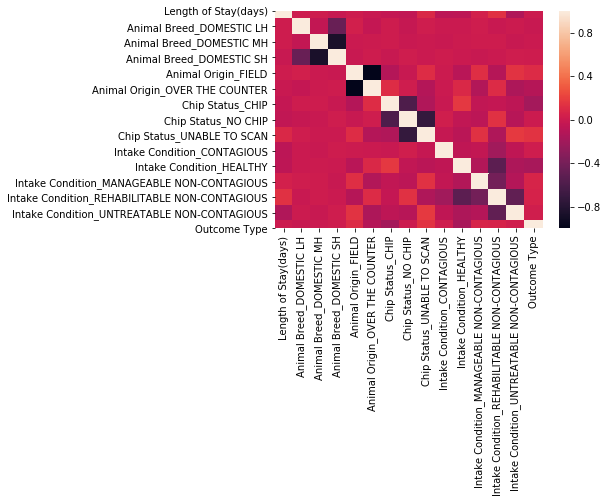

In [26]:
sn.heatmap(test.corr())

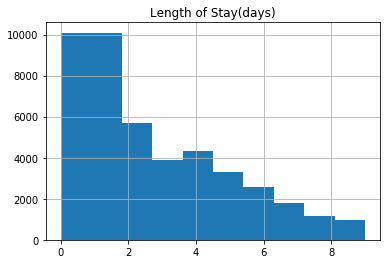

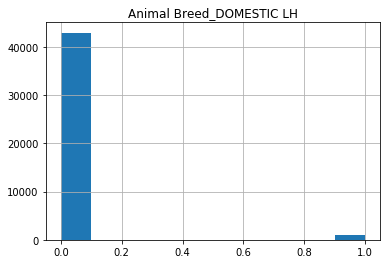

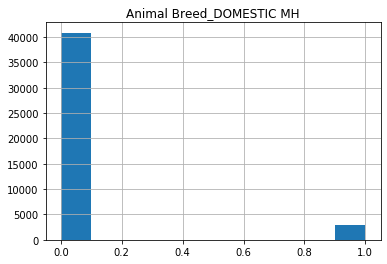

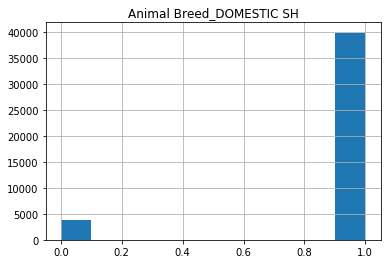

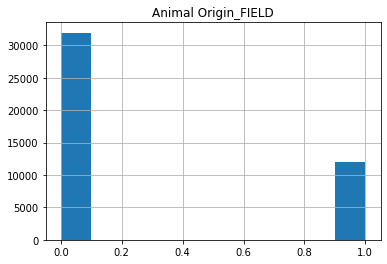

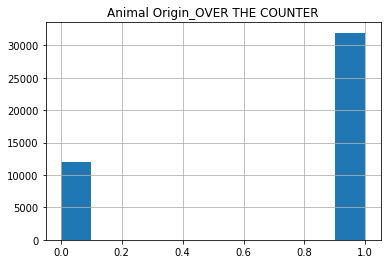

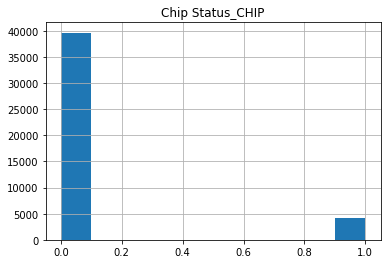

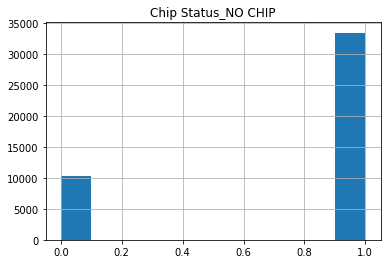

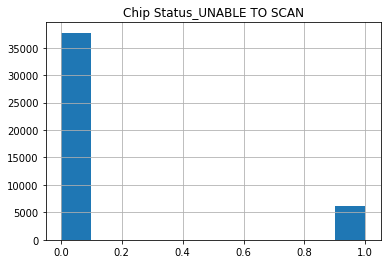

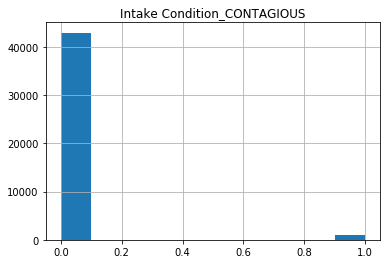

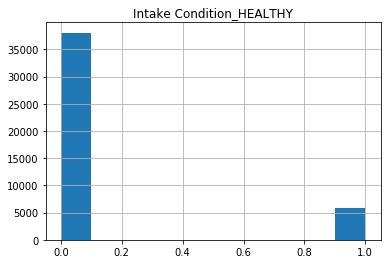

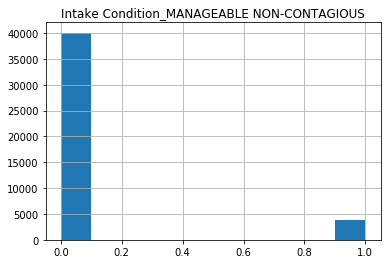

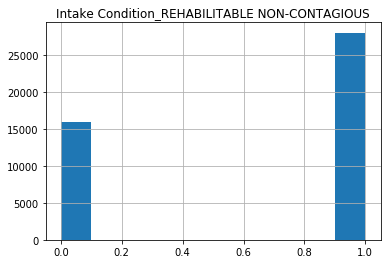

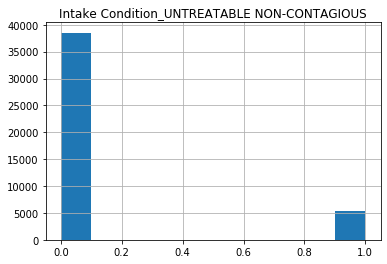

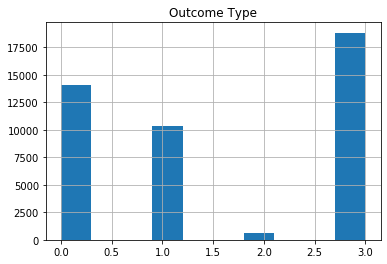

In [17]:
 #Plot histograms of data
for col in pd.concat([num_features, dums, target], axis=1).columns:
    pd.concat([num_features, dums, target], axis=1)[col].hist()
    plt.title(col)
    plt.savefig(f'../Resources/appx/cat_hist_{col}.png')
    plt.show()

In [ ]:
#Log Reg Models

In [18]:
#Split data
data = pd.concat([num_features, dums_notone], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target.values, random_state=19, stratify=target) #stratify for unequal target weights
y_train = y_train.ravel()
y_test = y_test.ravel()

In [19]:
#Scale Data
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      3511
           1       0.64      0.34      0.45      2585
           2       0.00      0.00      0.00       159
           3       0.51      0.76      0.61      4710

    accuracy                           0.55     10965
   macro avg       0.44      0.39      0.40     10965
weighted avg       0.57      0.55      0.54     10965


Confusion Matrix:
[[1601   58    0 1852]
 [ 156  891    0 1538]
 [  74   28    0   57]
 [ 746  405    0 3559]]

ROC Curve:


C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


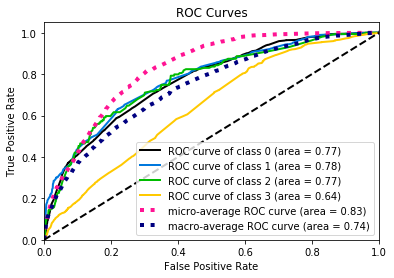

In [21]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test.ravel(), proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_logreg.png')

plt.show()

k: 1, Train/Test Score: 0.486/0.479
k: 3, Train/Test Score: 0.527/0.521
k: 5, Train/Test Score: 0.521/0.508
k: 7, Train/Test Score: 0.533/0.524
k: 9, Train/Test Score: 0.537/0.530
k: 11, Train/Test Score: 0.542/0.536
k: 13, Train/Test Score: 0.545/0.536
k: 15, Train/Test Score: 0.564/0.557
k: 17, Train/Test Score: 0.555/0.545
k: 19, Train/Test Score: 0.562/0.553


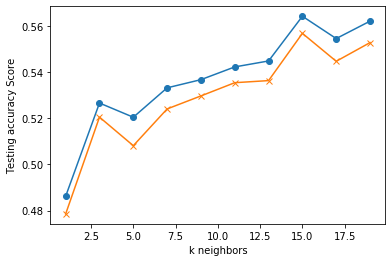

In [22]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig(f'../Resources/appx/cat_kneighbor_elbow.png')

plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.50      0.54      3511
           1       0.65      0.39      0.49      2585
           2       0.00      0.00      0.00       159
           3       0.52      0.71      0.60      4710

    accuracy                           0.56     10965
   macro avg       0.44      0.40      0.41     10965
weighted avg       0.56      0.56      0.55     10965


Confusion Matrix:
[[1749  116    3 1643]
 [ 237 1017    1 1330]
 [  66   26    0   67]
 [ 955  412    2 3341]]

ROC Curve:


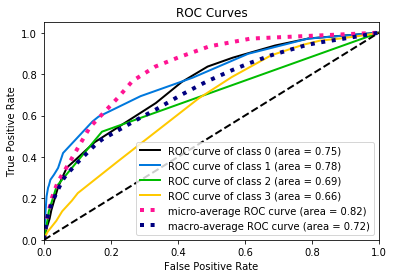

In [23]:
 #KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds)
plt.savefig(f'../Resources/appx/cat_roc_kneighbors.png')

plt.show()

In [21]:
#SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

KeyboardInterrupt: 

In [ ]:
#TREES

In [9]:
#Re-Split data
data = pd.concat([num_features, dums], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target.values, random_state=19, stratify=target) #stratify for unequal target weights
y_train = y_train.ravel()
y_test = y_test.ravel()

In [42]:
#Re-Scale Data
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      3511
           1       0.71      0.40      0.52      2585
           2       0.12      0.02      0.03       159
           3       0.53      0.74      0.62      4710

    accuracy                           0.57     10965
   macro avg       0.49      0.42      0.43     10965
weighted avg       0.59      0.57      0.56     10965


Confusion Matrix:
[[1768   79   12 1652]
 [ 221 1043    1 1320]
 [  68   24    3   64]
 [ 912  316    9 3473]]

ROC Curve:


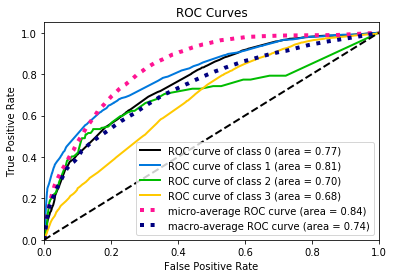

In [43]:
#Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_decision_tree.png')
plt.show()

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      3511
           1       0.70      0.41      0.52      2585
           2       0.11      0.02      0.03       159
           3       0.53      0.73      0.62      4710

    accuracy                           0.57     10965
   macro avg       0.49      0.42      0.43     10965
weighted avg       0.59      0.57      0.56     10965


Confusion Matrix:
[[1762   77   15 1657]
 [ 214 1072    1 1298]
 [  66   26    3   64]
 [ 902  346    9 3453]]

ROC Curve:


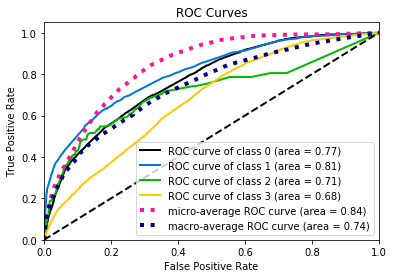

In [44]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_bagging.png')
plt.show()

C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.54      3511
           1       0.70      0.41      0.52      2585
           2       0.14      0.02      0.03       159
           3       0.53      0.73      0.62      4710

    accuracy                           0.57     10965
   macro avg       0.49      0.42      0.43     10965
weighted avg       0.59      0.57      0.56     10965


Confusion Matrix:
[[1752   80   11 1668]
 [ 212 1067    1 1305]
 [  59   25    3   72]
 [ 899  354    6 3451]]

ROC Curve:


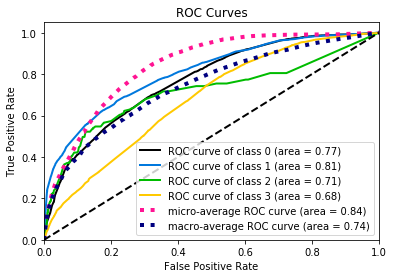

In [45]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_random_forest.png')
plt.show()

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.44      0.52      3511
           1       0.69      0.39      0.50      2585
           2       0.12      0.01      0.02       159
           3       0.51      0.78      0.62      4710

    accuracy                           0.57     10965
   macro avg       0.49      0.40      0.42     10965
weighted avg       0.59      0.57      0.55     10965


Confusion Matrix:
[[1533   42    1 1935]
 [ 114 1010    2 1459]
 [  68   31    2   58]
 [ 662  375   11 3662]]

ROC Curve:


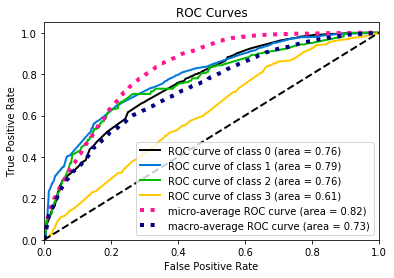

In [46]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_ada_boost.png')
plt.show()

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      3511
           1       0.74      0.40      0.52      2585
           2       0.31      0.03      0.06       159
           3       0.53      0.75      0.62      4710

    accuracy                           0.58     10965
   macro avg       0.55      0.42      0.44     10965
weighted avg       0.60      0.58      0.57     10965


Confusion Matrix:
[[1770   45    2 1694]
 [ 210 1024    6 1345]
 [  68   22    5   64]
 [ 883  300    3 3524]]

ROC Curve:


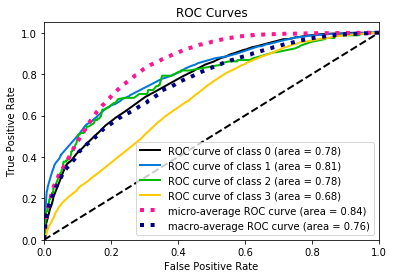

In [48]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.savefig(f'../Resources/appx/cat_roc_grad_boost.png')
plt.show()

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      3511
           1       0.73      0.39      0.51      2585
           2       0.25      0.02      0.04       159
           3       0.53      0.75      0.62      4710

    accuracy                           0.58     10965
   macro avg       0.53      0.42      0.43     10965
weighted avg       0.60      0.58      0.56     10965


Confusion Matrix:
[[1765   63    4 1679]
 [ 220 1021    0 1344]
 [  66   24    3   66]
 [ 887  284    5 3534]]

ROC Curve:


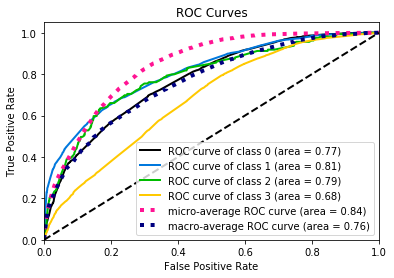

In [49]:
#EXTREME Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds)
plt.savefig(f'../Resources/appx/cat_roc_xg_boost.png')
plt.show()

In [ ]:
#Selecting Grad Boost

In [14]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(data)
X_scaled_prod = X_scaler_prod.transform(data)

Gradient Boosting Analysis PROD:
Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55     14044
           1       0.74      0.39      0.51     10339
           2       0.40      0.03      0.06       637
           3       0.53      0.75      0.62     18839

    accuracy                           0.58     43859
   macro avg       0.57      0.42      0.44     43859
weighted avg       0.60      0.58      0.56     43859


Confusion Matrix:
[[ 6974   175     8  6887]
 [  842  4066    16  5415]
 [  271   103    21   242]
 [ 3450  1171     8 14210]]

ROC Curve:


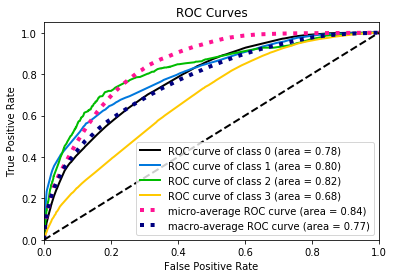

In [51]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_scaled_prod, target.values.ravel()) #fit
preds = gbc.predict(X_scaled_prod) #predict
proba_preds = gbc.predict_proba(X_scaled_prod) #predict


print("Gradient Boosting Analysis PROD:")
print("Classification Report:")
print()
print(classification_report(target, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(target, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(target, proba_preds) 
plt.savefig(f'../Resources/appx/cat_prod_roc.png')
plt.show()

In [52]:
#Feature Importances
feature_import = pd.DataFrame(sorted(list(zip(gbc.feature_importances_, data.columns))), columns = ['Importance', 'Feature'])
feature_import

,Importance,Feature
0,0.000703,Animal Breed_DOMESTIC MH
1,0.001862,Animal Breed_DOMESTIC SH
2,0.003214,Animal Breed_DOMESTIC LH
3,0.006832,Intake Condition_MANAGEABLE NON-CONTAGIOUS
4,0.009019,Chip Status_NO CHIP
5,0.009451,Intake Condition_CONTAGIOUS
6,0.032875,Animal Origin_OVER THE COUNTER
7,0.034650,Chip Status_UNABLE TO SCAN
8,0.046054,Animal Origin_FIELD
9,0.068849,Intake Condition_REHABILITABLE NON-CONTAGIOUS


In [56]:
import pickle

AttributeError: 'StandardScaler' object has no attribute 'info'

In [58]:
#Save Scaler
filename = '../App/Models/cat_scaler.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [60]:
#Save Model
filename = '../App/Models/cat_model.sav'
pickle.dump(gbc, open(filename, 'wb'))